In [4]:
from lsst.pipe.tasks.sourceClassification import SourceClassificationTask
import lsst.afw.table as afwTable
import lsst.afw.geom as afwGeom
import glob
import sncosmo
import pickle
from astropy.table import Table
import re
import astropy.coordinates as coord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import glob

/renoir_data_00/fouchez/lsst/DM/stacks/lsstsw/2016-04-04/lsstsw/miniconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [41]:
def build_lightcurve(source_list):
    """
    Assemble a light curve data table from available files.
    """

    bandpasses = ['r','i']


    lightcurve = {}
    lightcurve['classification'] = []
    lightcurve['bandpass'] = []
    lightcurve['mjd'] = []
    lightcurve['ra'] = []
    lightcurve['dec'] = []
    lightcurve['flux'] = []
    lightcurve['flux_error'] = []
    lightcurve['zp'] = []
    lightcurve['zpsys'] = []


    for visit, src in source_list:

        #print 'yep',visit
        lightcurve['classification'].append(src['classification_dipole'])
        lightcurve['bandpass'].append(str('sdss' + bandpasses[0]))
        
        lightcurve['mjd'].append(mjds[str(visit)])
        lightcurve['ra'].append(src['coord_ra'])
        lightcurve['dec'].append(src['coord_dec'])
        lightcurve['flux'].append(src['base_CircularApertureFlux_4_5_flux'])
        lightcurve['flux_error'].append(src['base_CircularApertureFlux_4_5_fluxSigma'])
        #lightcurve['flux'].append(src['base_CircularApertureFlux_12_0_flux'])
        #lightcurve['flux_error'].append(src['base_CircularApertureFlux_12_0_fluxSigma'])
        lightcurve['zp'].append(25.0)
        lightcurve['zpsys'].append('ab')
    lightcurve = Table(data=lightcurve)
    return lightcurve


In [34]:
pkl_file = open('mjd_dict.pickle', 'rb')
mjds = pickle.load(pkl_file)

In [130]:
def source_distance(src1, src2):
    ra, dec = src1['ra'], src1['dec']
    ra2, dec2 = src2['ra'], src2['dec']
            
    return np.sqrt((float(ra)-float(ra2))**2+(float(dec)-float(dec2))**2)/3.14159*180*3600

def threshold_light_curves(light_curves, threshold):
    t_light_curves = [lc for lc in light_curves if len(lc) >= threshold]
    return t_light_curves

def build_light_curve_from_snls_file(data):

 

    lightcurve = {}
    lightcurve['bandpass'] = []
    lightcurve['mjd'] = []
    #lightcurve['ra'] = []
    #lightcurve['dec'] = []
    lightcurve['flux'] = []
    lightcurve['flux_error'] = []
    lightcurve['zp'] = []
    lightcurve['zpsys'] = []


    for bandpass, mjd, flux, error in data:

        #print 'yep',visit
        lightcurve['bandpass'].append(str('sdss' + bandpass))
        lightcurve['mjd'].append(float(mjd))
        #lightcurve['ra'].append(c.ra.radian)
        #lightcurve['dec'].append(c.dec.radian)
        lightcurve['flux'].append(float(flux))
        lightcurve['flux_error'].append(float(error))
        #lightcurve['flux'].append(src['base_CircularApertureFlux_12_0_flux'])
        #lightcurve['flux_error'].append(src['base_CircularApertureFlux_12_0_fluxSigma'])
        lightcurve['zp'].append(25.0)
        lightcurve['zpsys'].append('ab')

    lc = Table(data=lightcurve)
    return lc

def build_lightcurve(source_list):
    """
    Assemble a light curve data table from available files.
    """



    lightcurve = {}
    lightcurve['classification'] = []
    lightcurve['bandpass'] = []
    lightcurve['mjd'] = []
    lightcurve['ra'] = []
    lightcurve['dec'] = []
    lightcurve['flux'] = []
    lightcurve['flux_error'] = []
    lightcurve['zp'] = []
    lightcurve['zpsys'] = []


    for visit, src in source_list:

        #print 'yep',visit
        bandpass = 'r' if src["filter"]==1 else 'i'
        lightcurve['classification'].append(src['classification_dipole'])
        lightcurve['bandpass'].append(str('sdss' + bandpass))
        
        lightcurve['mjd'].append(mjds[str(visit)])
        lightcurve['ra'].append(src['coord_ra'])
        lightcurve['dec'].append(src['coord_dec'])
        lightcurve['flux'].append(src['base_CircularApertureFlux_4_5_flux'])
        lightcurve['flux_error'].append(src['base_CircularApertureFlux_4_5_fluxSigma'])
        #lightcurve['flux'].append(src['base_CircularApertureFlux_12_0_flux'])
        #lightcurve['flux_error'].append(src['base_CircularApertureFlux_12_0_fluxSigma'])
        lightcurve['zp'].append(25.0)
        lightcurve['zpsys'].append('ab')
    lightcurve = Table(data=lightcurve)
    return lightcurve

def mean_lc_flux(lc2):

    mjds = []
    m_fluxes = []
    m_error = []
    s_error = []
    i = 0
    while i < len(lc2['mjd']):
        mjd = lc2['mjd'][i]
        j = i+1
        mjds.append(int(mjd))
        m_fluxes.append(lc2['flux'][i]*lc2['flux_error'][i])
        m_error.append(lc2['flux_error'][i])
        s_error.append(lc2['flux_error'][i]**2)
        total = 1.
       
        while j<len(lc2['mjd']) and int(lc2['mjd'][j]) == int(mjd):

            m_fluxes[-1]+= lc2['flux'][j]*lc2['flux_error'][j]
            

                
            m_error[-1] += lc2['flux_error'][j]
            s_error[-1] += (lc2['flux_error'][j]**2)
            #mjds[-1] += int(lc2['mjd'][j])
            total+=1
            j+=1
            
       
        m_fluxes[-1] = np.divide(m_fluxes[-1], m_error[-1] )
        m_error[-1] = np.divide(np.sqrt(s_error[-1]), total)
        i = j

    return mjds, m_fluxes, m_error


In [6]:
text = "/renoir_data_02/jpreyes/lsst_data/CFHTLS_master/output/ --output /renoir_data_02/jpreyes/lsst_data/CFHTLS_master/output --id visit=836493..860150 filter=r --config sigma=4.0 --clobber-config -j 15 -t 999999"
params = text.split(" ")

In [ ]:
res = SourceClassificationTask.parseAndRun(params, doReturnResults=True)

In [57]:
season_catalogs = []
visit_refs = []
rList = res.resultList

visit_catalog = None
current = 0

for r in rList:
    
    if r.result!= None:
        visit =  r.dataRef.dataId["visit"]
        catalog = r.result.classification
        if visit_catalog == None:
            visit_catalog=catalog
        else:
            visit_catalog.extend(catalog)

        if current  !=  visit:
            season_catalogs.append(visit_catalog)
            visit_refs.append(visit)
            visit_catalog = None
            current = visit
    

In [61]:
for s_catalog, visit_ref in zip(season_catalogs, visit_refs):
    s_catalog.writeFits("season_catalogs/6sigma/"+str(visit_ref)+".fits")

In [59]:
len(season_catalogs), len(visit_refs)

(286, 286)

In [25]:
season_catalogs = []
visit_refs = []
in_directory = "season_catalogs/6sigma/"
c_files = glob.glob(in_directory+"*.fits")
for c_f in c_files:
    catalog = afwTable.SourceCatalog.readFits(c_f)
    visit =  c_f.split("/")[-1].split("-")[0]
    fil  = c_f.split("/")[-1].split("-")[-1].split(".")[0]
    if fil == "i":
        season_catalogs.append(catalog)
        visit_refs.append(visit)
    


In [26]:
print len(season_catalogs), len(visit_refs)

173 173


In [23]:
multi_matches = None

In [27]:

import string

for s_catalog, visit in zip(season_catalogs, visit_refs):
           
        if multi_matches is None and len(catalog)>0:
            multi_matches = afwTable.MultiMatch(s_catalog[0].schema, {'visit':int, "filter":int,}, radius=afwGeom.Angle(1./3600., afwGeom.degrees))
        if multi_matches is not None:
            multi_matches.add(s_catalog, {'visit':int(visit), "filter":2})



In [28]:
results = multi_matches.finish(removeAmbiguous=False)  
print len(results)

617715


In [29]:
light_curves = []
i = 0
current = -1
while i < len(results):
    result = results[i]
    if current == -1 or current != result['object']:
        lc = [(result['visit'],result)]
        light_curves.append(lc)
        current = result['object']
    else:
        light_curves[-1].append((result['visit'],result))
    i+=1

t_light_curves = threshold_light_curves(light_curves, 20)
print len(t_light_curves)

4729


In [75]:
lcs = []
for t_light_curve in t_light_curves:
    lcs.append(build_lightcurve(t_light_curve))

blue
red


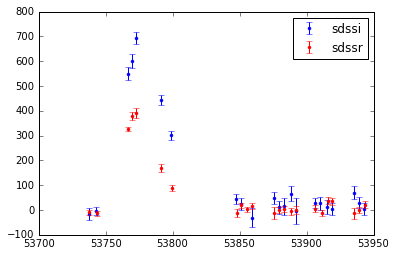

blue
red


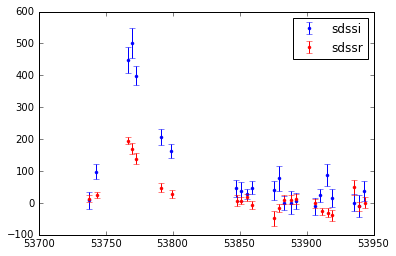

blue
red


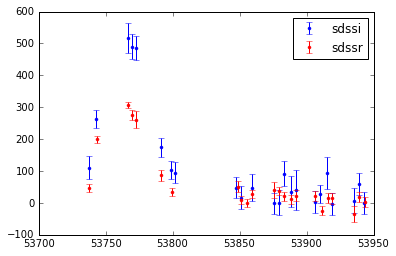

blue
red


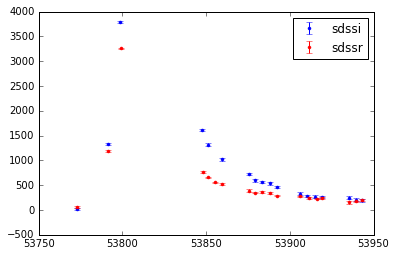

blue
red


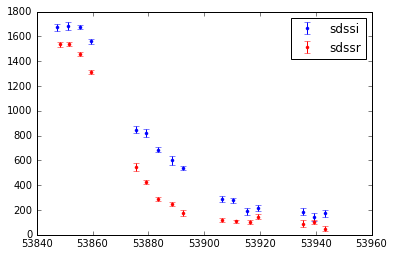

blue
red


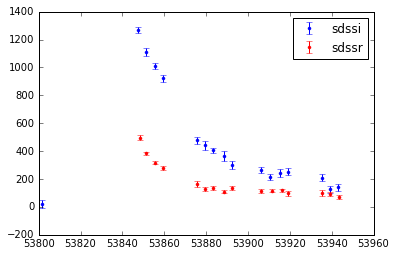

blue
red


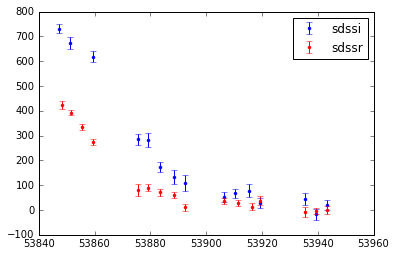

blue
red


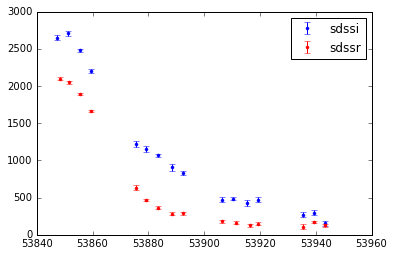

blue
red


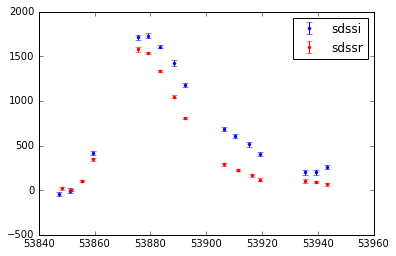

blue
red


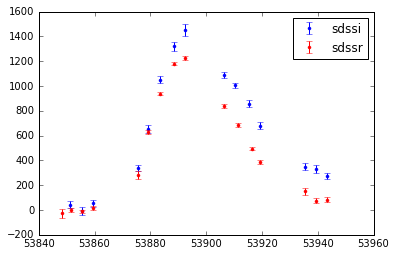

blue
red


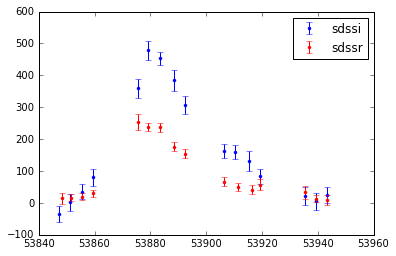

blue
red


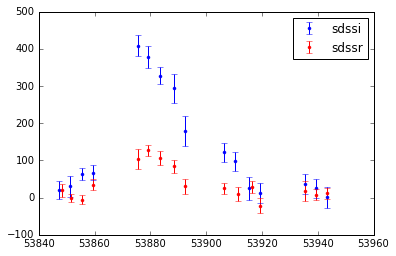

blue
red


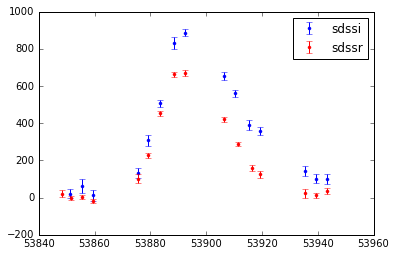

blue
red


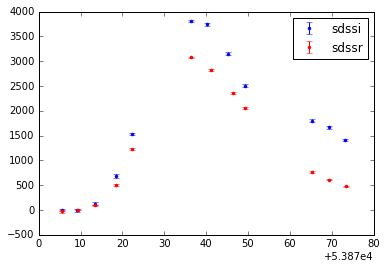

blue
red


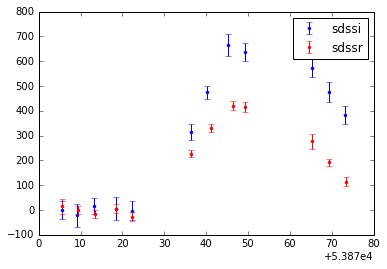

blue
red


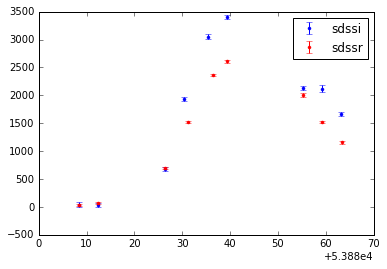

blue
red


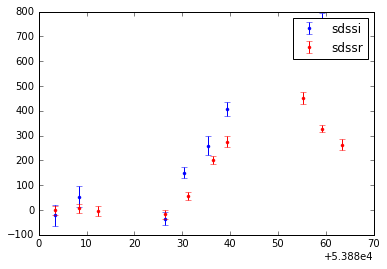

In [125]:


f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table9.dat.txt','r')
data_elems = f.read()
#m = re.findall('^06D3.*?\\|(.*?)\\|', data, re.MULTILINE)
elems = re.findall('^(06D3.*?)\\|(.*?)\\|', data_elems, re.MULTILINE)

f = open('/renoir_data_02/jpreyes/lsst_data/sn_control/J_A+A_523_A7_table10.dat.txt','r')
data = f.read()

colors = ["blue", "red", "yellow", "green", "black"]

%matplotlib inline
snls_array = []
for sn in elems:
    
    c = coord.SkyCoord(sn[-1], unit=(u.hourangle, u.deg))
    
    m = re.findall('^'+str(sn[0])+'\\|(r|i)\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

    snls_lc = build_light_curve_from_snls_file(m)
    
    g_lc = snls_lc.group_by("bandpass")
    filters = g_lc.groups
    for i  in range(0,len(filters)):
        
        f_lc = g_lc[filters.indices[i]:filters.indices[i+1]]
        print colors[i%len(colors)]
        plt.errorbar(f_lc['mjd'], f_lc['flux'], yerr=f_lc['flux_error'], fmt='.', color=colors[i%len(colors)], label=f_lc[0]["bandpass"])
    
    snls_array.append(snls_lc)
    plt.legend(numpoints=1)
    plt.show()
    
#pickle.dump(snls_array, open('/renoir_data_02/jpreyes/lsst_data/transients_files/snls_transients_filter_r.lc', 'wb'))

In [114]:
c = snls_lc.group_by("bandpass")
filters = c.groups
print len(filters),filters.indices

2 [ 0 22 45]


mjd,zpsys,flux,flux_error,zp,bandpass
float64,str2,float64,float64,float64,str5
53883.35,ab,-21.308,42.115,25.0,sdssi
53883.37,ab,-1.35,17.528,25.0,sdssr
53888.36,ab,54.146,43.076,25.0,sdssi
53888.38,ab,6.1937,18.203,25.0,sdssr
53892.35,ab,-5.454,19.695,25.0,sdssr
53906.31,ab,-34.334,27.503,25.0,sdssi
53906.35,ab,-17.199,18.08,25.0,sdssr
53910.36,ab,150.81,23.398,25.0,sdssi
53911.28,ab,55.946,15.817,25.0,sdssr


In [126]:

matches = []
for sn in elems:
    
    match = False
    c = coord.SkyCoord(sn[-1], unit=(u.hourangle, u.deg))
    
    
    for i, lc in enumerate(lcs):
        #print lc[0]['ra']
        #print lc[0]['dec']
        if source_distance(lc[0], {'ra':c.ra.radian, 'dec':c.dec.radian}) < 2:
            match = True
 
            matches.append((sn[0], i))
            break
    
        #print 'no match'
print 'found ' + str(float(len(matches))/float(len(elems))) 

found 0.176470588235


In [135]:
float(len(matches))/float(len(elems))

0.17647058823529413

In [59]:
c =lc.group_by("bandpass")
c.groups

<TableGroups indices=[  0 222]>

mjd,classification,zpsys,flux,ra,flux_error,dec,zp,bandpass
float64,float64,str2,float64,object,float64,object,float64,str5
53769.5511046,6.0,ab,9355.02441406,3.74261 rad,246.654663086,0.913877 rad,25.0,sdssr
53772.6347399,3.0,ab,-21529.3203125,3.74262 rad,399.267364502,0.913879 rad,25.0,sdssr
53791.5808564,6.0,ab,13584.3603516,3.74261 rad,367.332794189,0.913878 rad,25.0,sdssr
53791.5973271,6.0,ab,7052.93457031,3.74261 rad,225.166183472,0.913879 rad,25.0,sdssr
53799.4480172,3.0,ab,-14359.2744141,3.74261 rad,424.053527832,0.913879 rad,25.0,sdssr
53799.4561562,0.0,ab,3543.69067383,3.74261 rad,269.120117188,0.913882 rad,25.0,sdssr
53855.3896262,3.0,ab,11114.7167969,3.74261 rad,273.652038574,0.913875 rad,25.0,sdssr
53855.4018923,0.0,ab,3435.96557617,3.74261 rad,277.661590576,0.913877 rad,25.0,sdssr
53875.4951733,6.0,ab,8256.22851562,3.74261 rad,496.005401611,0.913877 rad,25.0,sdssr


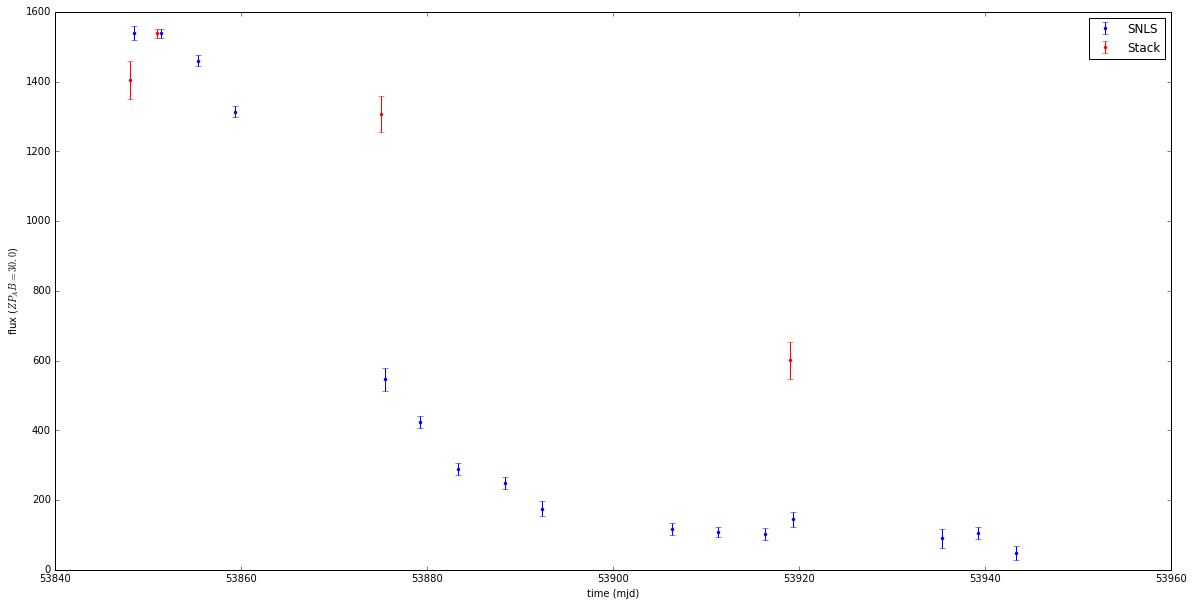

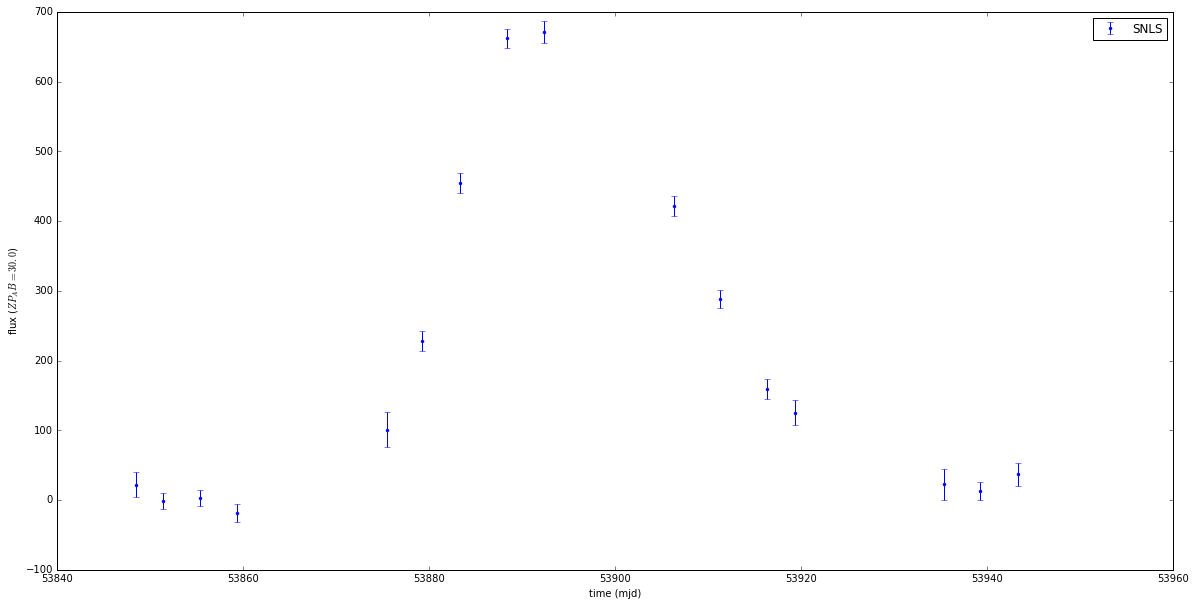

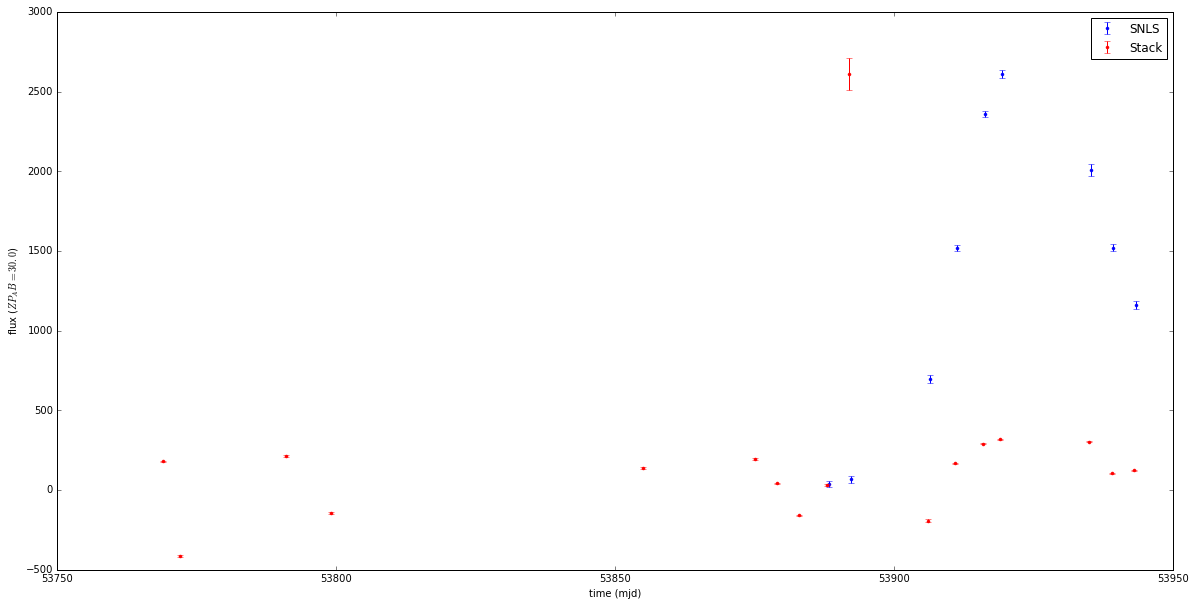

In [158]:
filter = "r"
for match in matches:


    m = re.findall('^'+str(match[0])+'\\|('+filter+')\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

    plt.figure(figsize=(20,10))
    
    snls_lc = build_light_curve_from_snls_file(m)
    plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue', label='SNLS')



    lc = lcs[match[-1]]  
   
    
    g_lc = lc.group_by("bandpass")
    filters = g_lc.groups
    
    for i in range(0,len(filters)):
        f_lc = g_lc[filters.indices[i]:filters.indices[i+1]]
        if f_lc[0]["bandpass"] == "sdss"+filter:
            break
        f_lc = None
   

    #print lc, lc_copy
    if f_lc is not None:
        m_mjd, m_f, m_e = mean_lc_flux(f_lc)

        factor = max(snls_lc['flux']) / max(m_f)
        f_mf = np.multiply(m_f, factor)
        f_me = np.multiply(m_e, factor)
        plt.errorbar(m_mjd, f_mf, yerr=f_me, fmt='.', color='red', label='Stack')
    
    plt.xlabel('time (mjd)')
    plt.ylabel('flux ($ZP_AB=30.0$)')

    plt.legend(numpoints=1)
    plt.show()

     mjd      classification zpsys      flux     ...     dec       zp  bandpass
------------- -------------- ----- ------------- ... ------------ ---- --------
53847.3810871            7.0    ab 11259.3662109 ... 0.924286 rad 25.0    sdssi
53847.3876926            7.0    ab 9101.58398438 ... 0.924283 rad 25.0    sdssi
 53847.394301            6.0    ab 10976.1220703 ... 0.924284 rad 25.0    sdssi
53847.4009095            7.0    ab 12327.5996094 ... 0.924286 rad 25.0    sdssi
53847.4207406            7.0    ab 9783.06152344 ... 0.924285 rad 25.0    sdssi
53847.4643677            7.0    ab 9966.47070312 ... 0.924287 rad 25.0    sdssi
53847.4908118            6.0    ab 12461.8603516 ... 0.924285 rad 25.0    sdssi
53847.4990278            7.0    ab 10112.8876953 ... 0.924285 rad 25.0    sdssi
53847.5056345            6.0    ab  7533.8515625 ... 0.924285 rad 25.0    sdssi
53847.5197877            7.0    ab 11868.4589844 ... 0.924285 rad 25.0    sdssi
          ...            ...   ...      

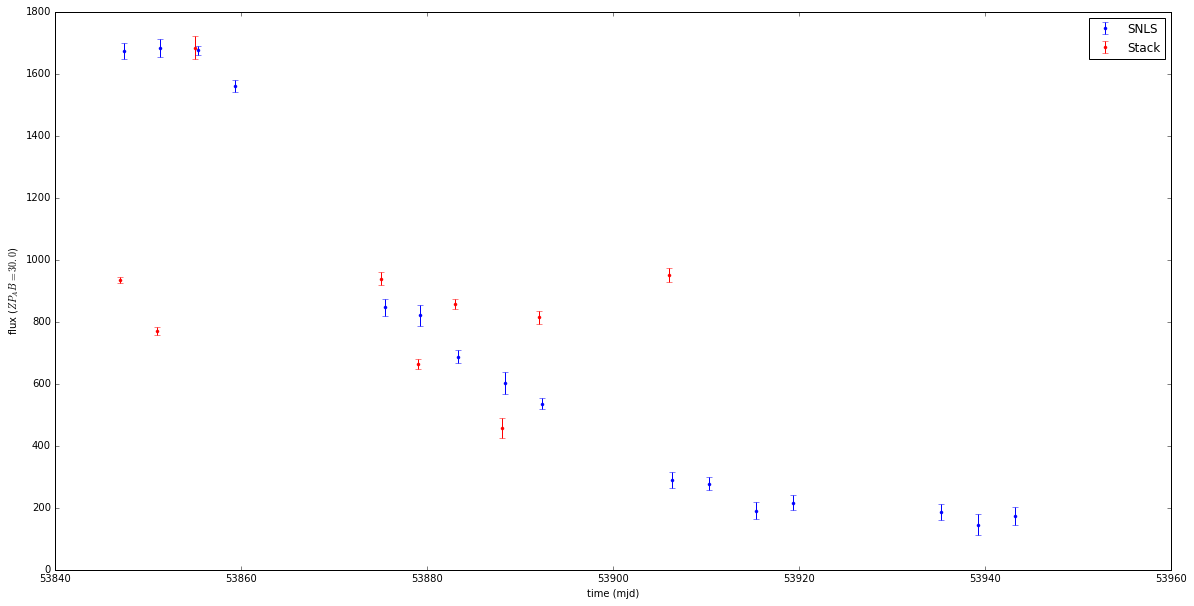

     mjd      classification zpsys      flux      ...     dec       zp  bandpass
------------- -------------- ----- -------------- ... ------------ ---- --------
53888.3558448            6.0    ab     5713.40625 ... 0.913481 rad 25.0    sdssi
53888.3605888            6.0    ab  7415.51464844 ... 0.913477 rad 25.0    sdssi
53888.3700882            6.0    ab  6341.57421875 ... 0.913478 rad 25.0    sdssi
53892.2990694            6.0    ab  2885.82421875 ... 0.913477 rad 25.0    sdssi
53892.3056888            3.0    ab -55788.5664062 ... 0.913478 rad 25.0    sdssi
53892.3123215            6.0    ab  14550.9414062 ... 0.913478 rad 25.0    sdssi
53892.3189479            6.0    ab  15270.6376953 ... 0.913478 rad 25.0    sdssi
53892.3255806            4.0    ab -14486.5839844 ... 0.913479 rad 25.0    sdssi
 53892.332214            6.0    ab  15082.8701172 ... 0.913479 rad 25.0    sdssi
53892.3388374            6.0    ab  10699.8398438 ... 0.913479 rad 25.0    sdssi
          ...            ...

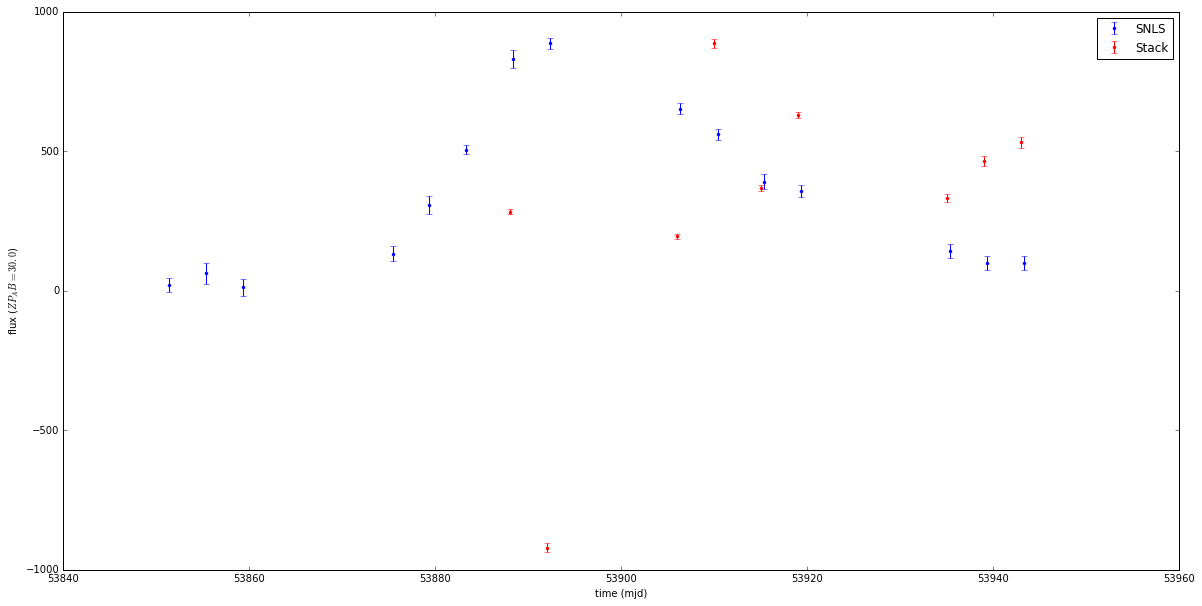

     mjd      classification zpsys      flux      ...     dec       zp  bandpass
------------- -------------- ----- -------------- ... ------------ ---- --------
53769.5724188            6.0    ab  10123.6533203 ... 0.913878 rad 25.0    sdssi
 53769.577223            6.0    ab  5505.72558594 ... 0.913881 rad 25.0    sdssi
53769.5820201            6.0    ab  14625.6181641 ...  0.91388 rad 25.0    sdssi
53772.5760205            3.0    ab -8884.24316406 ... 0.913877 rad 25.0    sdssi
 53791.492991            6.0    ab  11213.2021484 ...  0.91388 rad 25.0    sdssi
53791.4996081            6.0    ab  6965.53222656 ... 0.913881 rad 25.0    sdssi
53791.5333174            6.0    ab  9520.97753906 ... 0.913879 rad 25.0    sdssi
53791.6089769            6.0    ab  9043.66210938 ... 0.913879 rad 25.0    sdssi
53798.5642238            3.0    ab -4225.11523438 ...  0.91388 rad 25.0    sdssi
53798.5774991            3.0    ab -6463.17236328 ... 0.913874 rad 25.0    sdssi
          ...            ...

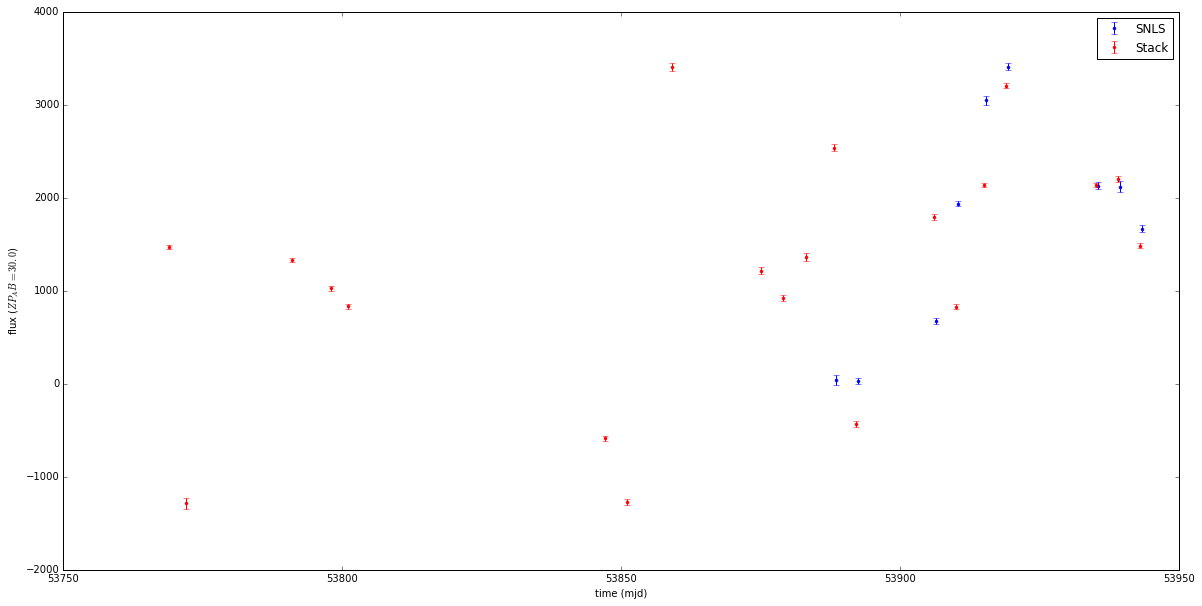

In [155]:
filter = "i"
for match in matches:


    m = re.findall('^'+str(match[0])+'\\|('+filter+')\\|(.*?)\\|(.*?)\\|(.*?)$', data, re.MULTILINE)

    plt.figure(figsize=(20,10))
    
    snls_lc = build_light_curve_from_snls_file(m)
    plt.errorbar(snls_lc['mjd'], snls_lc['flux'], yerr=snls_lc['flux_error'], fmt='.', color='blue', label='SNLS')



    lc = lcs[match[-1]]  
   
    
    g_lc = lc.group_by("bandpass")
    filters = g_lc.groups
    
    for i in range(0,len(filters)):
        f_lc = g_lc[filters.indices[i]:filters.indices[i+1]]
        if f_lc[0]["bandpass"] == "sdss"+filter:
            break

    print f_lc
    #print lc, lc_copy
    m_mjd, m_f, m_e = mean_lc_flux(f_lc)

    factor = max(snls_lc['flux']) / max(m_f)
    f_mf = np.multiply(m_f, factor)
    f_me = np.multiply(m_e, factor)
    
    
    plt.xlabel('time (mjd)')
    plt.ylabel('flux ($ZP_AB=30.0$)')
    plt.errorbar(m_mjd, f_mf, yerr=f_me, fmt='.', color='red', label='Stack')
    plt.legend(numpoints=1)
    plt.show()

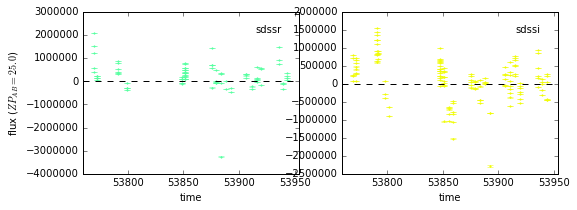

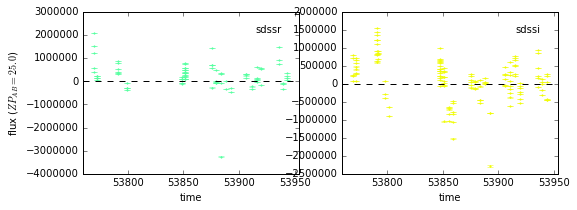

In [76]:
lc = lcs[0]
sncosmo.plot_lc(lc)